# Classification using MobileNetV2

In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model

image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/clasificare2/clasificare2/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    '/kaggle/input/clasificare2/clasificare2/val',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/clasificare2/clasificare2/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(*image_size, 3))

# Add custom classification layer
x = base_model.output
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 100

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_acc}")

Found 2880 images belonging to 3 classes.
Found 360 images belonging to 3 classes.
Found 360 images belonging to 3 classes.
Epoch 1/100
90/90 [==============================] - 153s 2s/step - loss: 0.7548 - accuracy: 0.6559 - val_loss: 0.4978 - val_accuracy: 0.7750
Epoch 2/100
90/90 [==============================] - 119s 1s/step - loss: 0.5151 - accuracy: 0.7760 - val_loss: 0.4732 - val_accuracy: 0.7917
Epoch 3/100
90/90 [==============================] - 118s 1s/step - loss: 0.4818 - accuracy: 0.7809 - val_loss: 0.4586 - val_accuracy: 0.8028
Epoch 4/100
90/90 [==============================] - 120s 1s/step - loss: 0.4747 - accuracy: 0.7906 - val_loss: 0.4474 - val_accuracy: 0.8028
Epoch 5/100
90/90 [==============================] - 118s 1s/step - loss: 0.4507 - accuracy: 0.7976 - val_loss: 0.4358 - val_accuracy: 0.8083
Epoch 6/100
90/90 [==============================] - 118s 1s/step - loss: 0.4466 - accuracy: 0.8059 - val_loss: 0.4318 - val_accuracy: 0.8139
Epoch 7/100
90/90 [=====

save images to a zip file

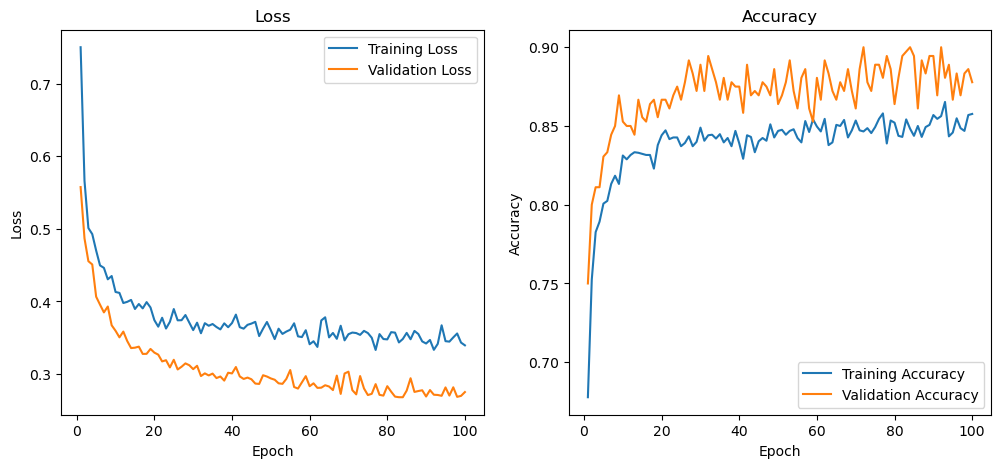

In [5]:
import matplotlib.pyplot as plt
def plot_history(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    epochs_range = range(1, len(train_loss) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')
    
    plt.show()



plot_history(history)

12/12 [==============================] - 13s 1s/step


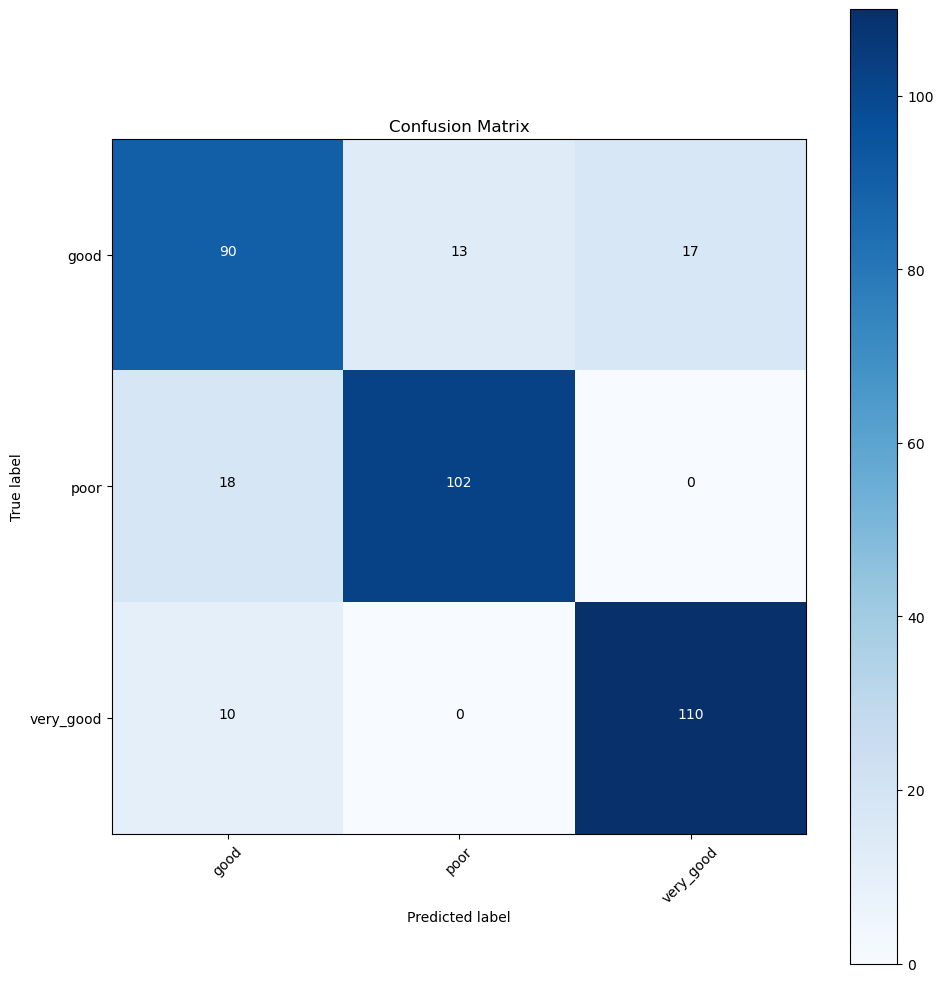

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools 
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# EfficientNetB7

In [3]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.applications.efficientnet import EfficientNetB7, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model

image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/clasificare2/clasificare2/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    '/kaggle/input/clasificare2/clasificare2/val',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/clasificare2/clasificare2/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

base_model = EfficientNetB7(weights='imagenet', include_top=False, pooling='avg', input_shape=(*image_size, 3))

x = base_model.output
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 100

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_acc}")


Found 2880 images belonging to 3 classes.
Found 360 images belonging to 3 classes.
Found 360 images belonging to 3 classes.
258076736/258076736 [==============================] - 1s 0us/step
Epoch 1/100


2023-04-19 14:32:39.525904: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_2/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


90/90 [==============================] - 147s 1s/step - loss: 0.7503 - accuracy: 0.6778 - val_loss: 0.5576 - val_accuracy: 0.7500
Epoch 2/100
90/90 [==============================] - 120s 1s/step - loss: 0.5661 - accuracy: 0.7524 - val_loss: 0.4868 - val_accuracy: 0.8000
Epoch 3/100
90/90 [==============================] - 120s 1s/step - loss: 0.5011 - accuracy: 0.7826 - val_loss: 0.4554 - val_accuracy: 0.8111
Epoch 4/100
90/90 [==============================] - 120s 1s/step - loss: 0.4927 - accuracy: 0.7892 - val_loss: 0.4509 - val_accuracy: 0.8111
Epoch 5/100
90/90 [==============================] - 119s 1s/step - loss: 0.4701 - accuracy: 0.8007 - val_loss: 0.4065 - val_accuracy: 0.8306
Epoch 6/100
90/90 [==============================] - 120s 1s/step - loss: 0.4496 - accuracy: 0.8024 - val_loss: 0.3955 - val_accuracy: 0.8333
Epoch 7/100
90/90 [==============================] - 120s 1s/step - loss: 0.4462 - accuracy: 0.8132 - val_loss: 0.3849 - val_accuracy: 0.8444
Epoch 8/100
90/90 

12/12 [==============================] - 66s 1s/step


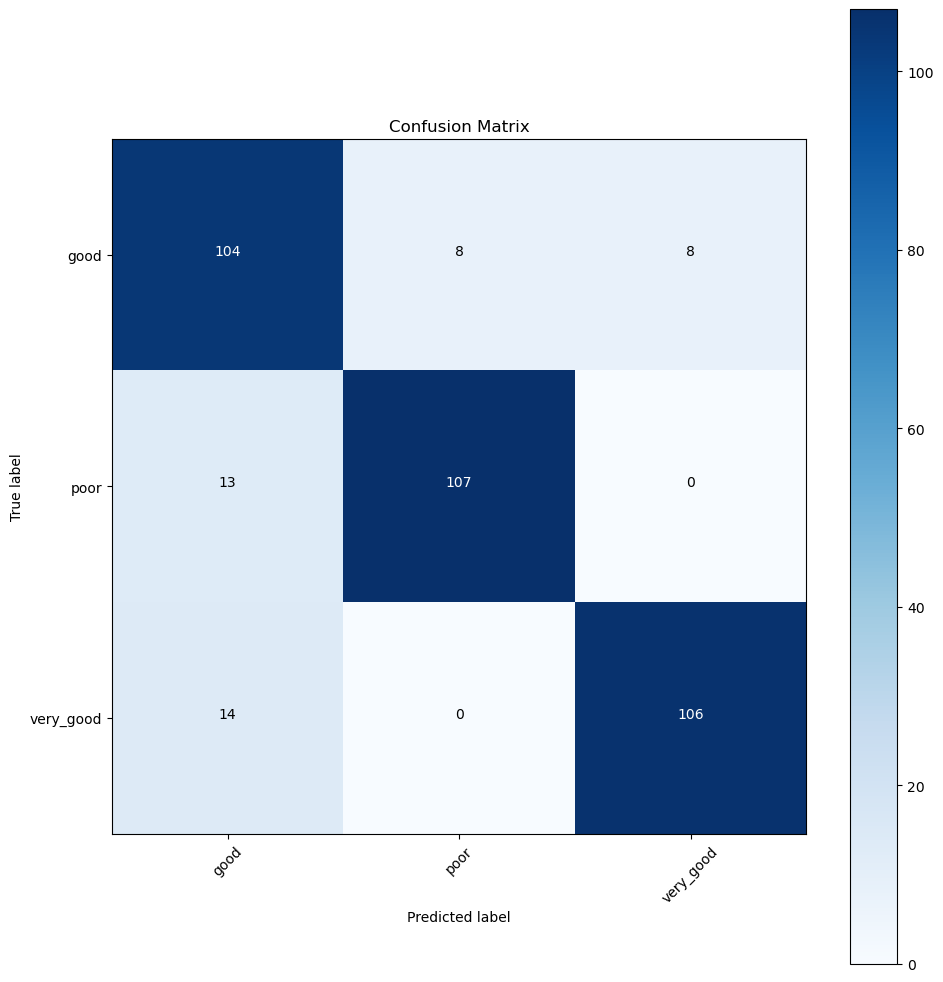

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools 
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# ResNet50V2

In [3]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/clasificare2/clasificare2/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    '/kaggle/input/clasificare2/clasificare2/val',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/clasificare2/clasificare2/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(*image_size, 3))

# Add custom classification layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 100

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_acc}")


Found 2880 images belonging to 3 classes.
Found 360 images belonging to 3 classes.
Found 360 images belonging to 3 classes.
94668760/94668760 [==============================] - 4s 0us/step
Epoch 1/100
90/90 [==============================] - 156s 2s/step - loss: 0.9950 - accuracy: 0.5649 - val_loss: 0.5564 - val_accuracy: 0.7861
Epoch 2/100
90/90 [==============================] - 116s 1s/step - loss: 0.5486 - accuracy: 0.7628 - val_loss: 0.4889 - val_accuracy: 0.8167
Epoch 3/100
90/90 [==============================] - 116s 1s/step - loss: 0.4771 - accuracy: 0.7962 - val_loss: 0.4498 - val_accuracy: 0.8222
Epoch 4/100
90/90 [==============================] - 117s 1s/step - loss: 0.4413 - accuracy: 0.8170 - val_loss: 0.4291 - val_accuracy: 0.8278
Epoch 5/100
90/90 [==============================] - 123s 1s/step - loss: 0.4299 - accuracy: 0.8135 - val_loss: 0.4112 - val_accuracy: 0.8528
Epoch 6/100
90/90 [==============================] - 116s 1s/step - loss: 0.4177 - accuracy: 0.8163 -

12/12 [==============================] - 14s 1s/step


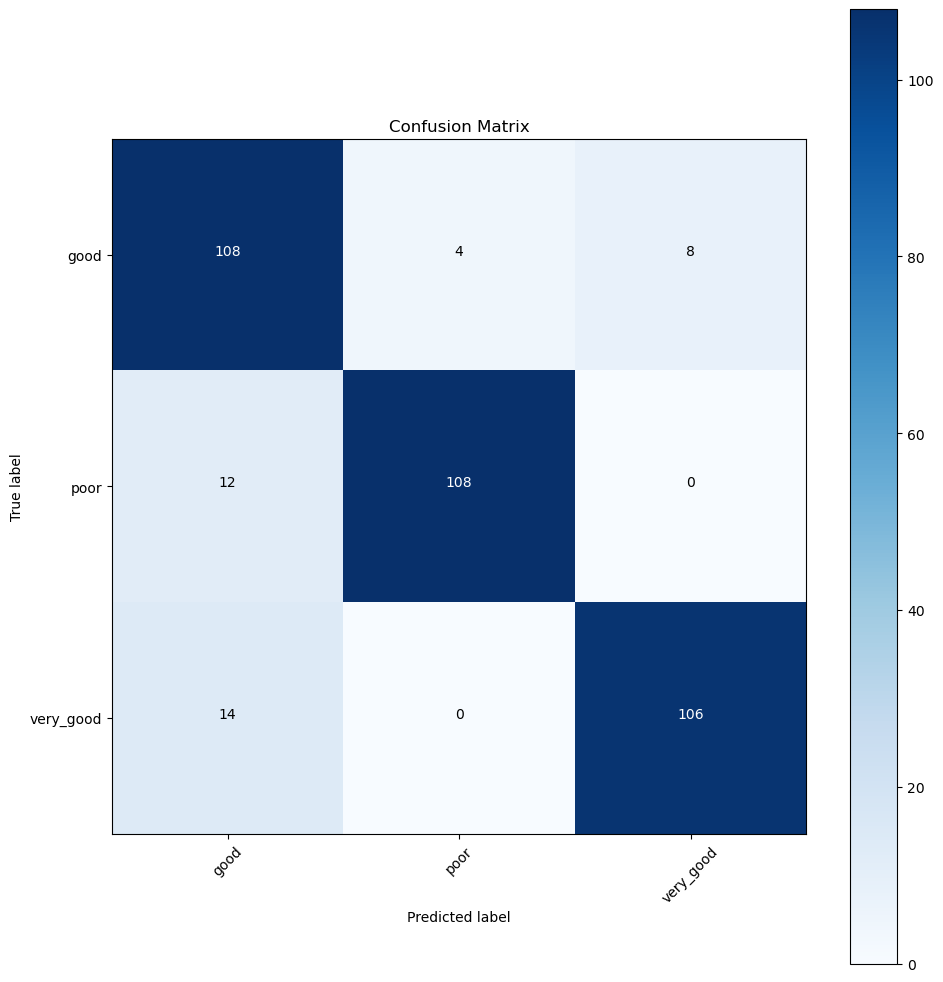

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools 
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

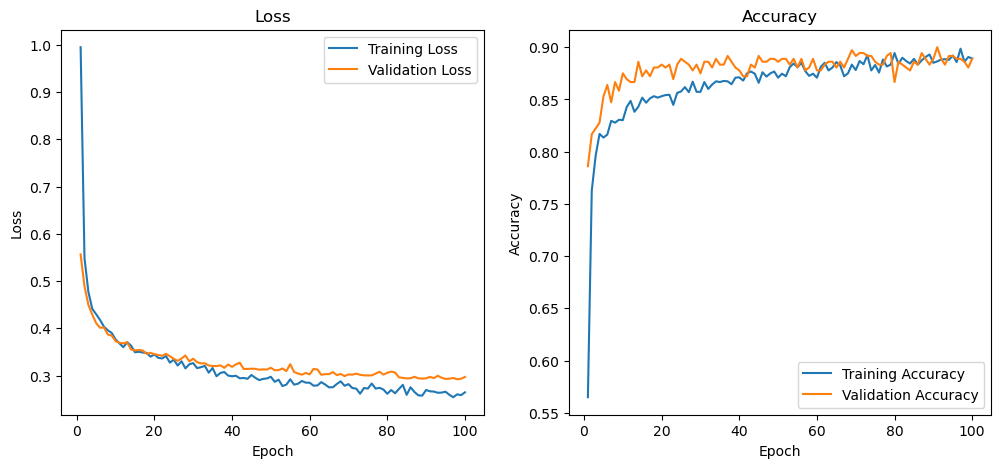

In [5]:
import matplotlib.pyplot as plt
def plot_history(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    epochs_range = range(1, len(train_loss) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')
    
    plt.show()



plot_history(history)

# InceptionV3

In [ ]:
## import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model

image_size = (299, 299)  
batch_size = 32

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/clasificare2/clasificare2/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    '/kaggle/input/clasificare2/clasificare2/val',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/clasificare2/clasificare2/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

base_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg', input_shape=(*image_size, 3))

# Add custom classification layer
x = base_model.output
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 100

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_acc}")


Found 2880 images belonging to 3 classes.
Found 360 images belonging to 3 classes.
Found 360 images belonging to 3 classes.
87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/100
90/90 [==============================] - 191s 2s/step - loss: 0.7099 - accuracy: 0.6854 - val_loss: 0.4557 - val_accuracy: 0.8139
Epoch 2/100
90/90 [==============================] - 125s 1s/step - loss: 0.4454 - accuracy: 0.8038 - val_loss: 0.3823 - val_accuracy: 0.8528
Epoch 3/100
90/90 [==============================] - 122s 1s/step - loss: 0.3938 - accuracy: 0.8250 - val_loss: 0.3329 - val_accuracy: 0.8639
Epoch 4/100
90/90 [==============================] - 123s 1s/step - loss: 0.3643 - accuracy: 0.8427 - val_loss: 0.3094 - val_accuracy: 0.8889
Epoch 5/100
90/90 [==============================] - 123s 1s/step - loss: 0.3345 - accuracy: 0.8625 - val_loss: 0.3020 - val_accuracy: 0.8861
Epoch 6/100
90/90 [==============================] - 123s 1s/step - loss: 0.3259 - accuracy: 0.8597 -

# Light pollution classification on mean intensity of pixels

# Logistic regression

In [1]:
import cv2
import numpy as np
import os
def mean_intensity(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return np.mean(gray_image)

def load_data(base_folder, bortle_folders):
    data = []
    labels = []
    
    for i, bortle_folder in enumerate(bortle_folders):
        image_folder = os.path.join(base_folder, bortle_folder)
        
        for image_name in os.listdir(image_folder):
            image_path = os.path.join(image_folder, image_name)
            image = cv2.imread(image_path)
            mean_int = mean_intensity(image)
            data.append(mean_int)
            labels.append(i)
    
    return np.array(data).reshape(-1, 1), np.array(labels)


In [19]:
import numpy as np
bortle_folders = ['very_good', 'good', 'poor']
train_base_folder = '/kaggle/input/clasificare2/clasificare2/train'
val_base_folder = '/kaggle/input/clasificare2/clasificare2/val'
test_base_folder = '/kaggle/input/clasificare2/clasificare2/test'

X_train, y_train = load_data(train_base_folder, bortle_folders)
X_val, y_val = load_data(val_base_folder, bortle_folders)
X_test, y_test = load_data(test_base_folder, bortle_folders)


In [20]:
# Combine the validation and test sets
X_combined = np.concatenate((X_val, X_test), axis=0)
y_combined = np.concatenate((y_val, y_test), axis=0)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_val_pred = logreg.predict(X_combined)
val_accuracy = accuracy_score(y_combined, y_val_pred)
print(f'Validation accuracy: {val_accuracy:.2f}')


Validation accuracy: 0.78


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


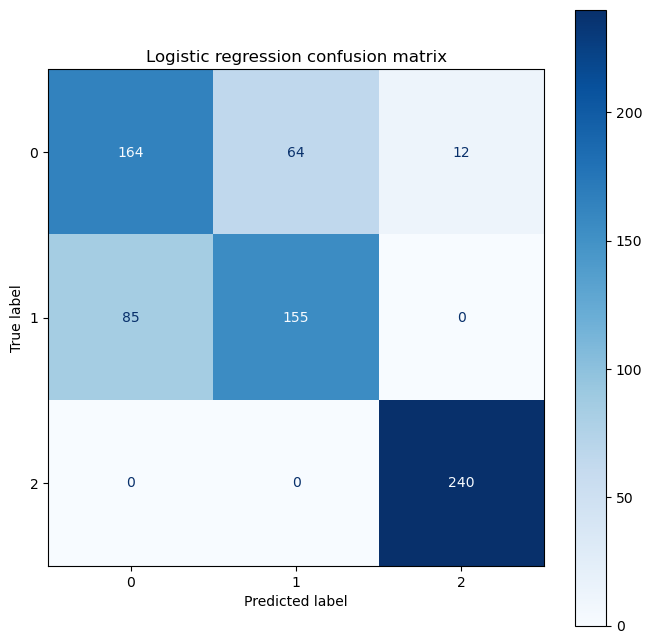

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(logreg, X_combined, y_combined, ax=ax, cmap='Blues')
plt.title('Logistic regression confusion matrix')
plt.show()

In [34]:
y_test_pred = logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {test_accuracy:.2f}')


Test accuracy: 0.78


# SVM

In [37]:
from sklearn.svm import SVC

model2 = SVC(kernel='rbf', probability=True)
model2.fit(X_train, y_train)

y_val_pred = model2.predict(X_combined)
val_accuracy = accuracy_score(y_combined, y_val_pred)
print(f'Validation accuracy: {val_accuracy:.2f}')
y_test_pred = model2.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {test_accuracy:.2f}')

Validation accuracy: 0.80


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


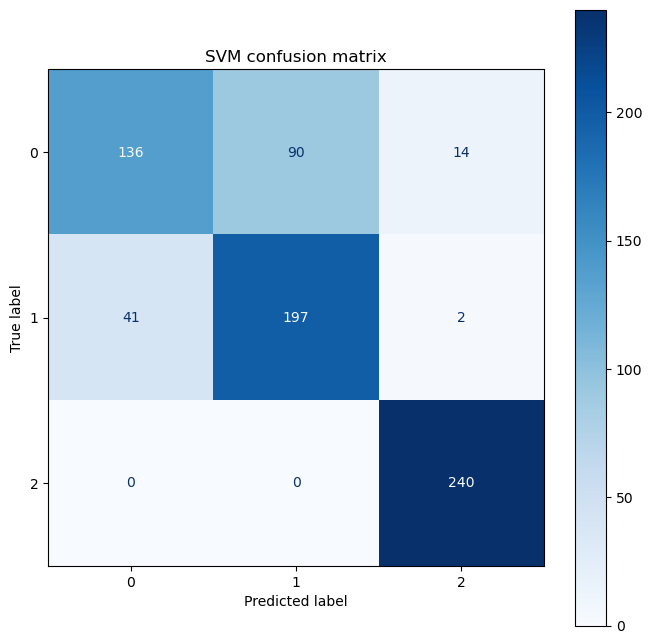

In [38]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(model2, X_combined, y_combined, ax=ax, cmap='Blues')
plt.title('SVM confusion matrix')
plt.show()

# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

k = 50  
model3 = KNeighborsClassifier(n_neighbors=k)
model3.fit(X_train, y_train)

y_val_pred = model3.predict(X_combined)
val_accuracy = accuracy_score(y_combined, y_val_pred)
print(f'Validation accuracy: {val_accuracy:.2f}')
# y_test_pred = model3.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f'Test accuracy: {test_accuracy:.2f}')

Validation accuracy: 0.80


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


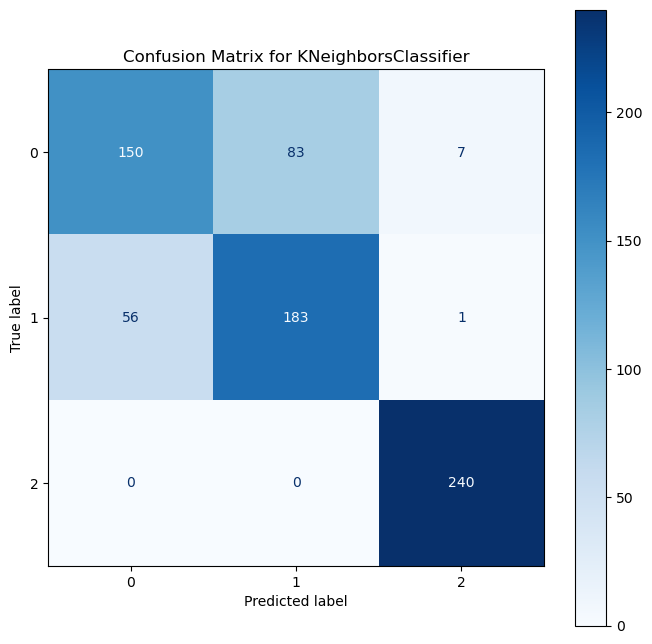

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(model3, X_combined, y_combined, ax=ax, cmap='Blues')
plt.title('Confusion Matrix for KNeighborsClassifier')
plt.show()

# Random forest classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 100  
random_forest = RandomForestClassifier(n_estimators=n_estimators)
random_forest.fit(X_train, y_train)

y_val_pred = random_forest.predict(X_combined)
val_accuracy = accuracy_score(y_combined, y_val_pred)
print(f'Validation accuracy: {val_accuracy:.2f}')
# y_test_pred = random_forest.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f'Test accuracy: {test_accuracy:.2f}')

Validation accuracy: 0.78


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


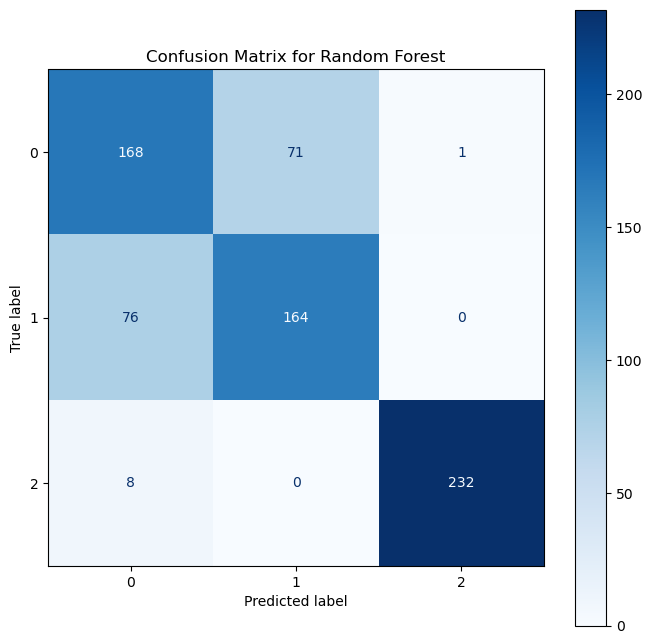

In [44]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(random_forest, X_combined, y_combined, ax=ax, cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# YOLOv8

In [44]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics

In [45]:
from ultralytics import YOLO

# model = YOLO('yolov8n-cls.yaml')  # build a new model from YAML
# model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n-cls.pt')#.load('yolov8n-cls.pt')  # build from YAML and transfer weights

model.train(data='/kaggle/input/clasificare2/clasificare2', epochs=100, imgsz=640)

In [46]:
metrics = model.val() 
metrics.top1   # top1 accuracy
metrics.top5   # top5 accuracy

In [47]:
!zip /kaggle/working/runs/classify/train5.zip /kaggle/working/runs/classify/train5

In [48]:
model.export()

# Voting classifier - logreg + svm + knn(5) + random forest

In [49]:
from sklearn.ensemble import VotingClassifier

logreg = LogisticRegression()
svm = SVC(kernel='linear', probability=True)
knn = KNeighborsClassifier(n_neighbors=k)

voting_clf = VotingClassifier(
    estimators=[('logreg', logreg), ('svm', svm), ('knn', knn), ('random_forest', random_forest)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

y_val_pred = voting_clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation accuracy (voting): {val_accuracy:.2f}')

y_test_pred = voting_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy (voting): {test_accuracy:.2f}')


Validation accuracy (voting): 0.76
Test accuracy (voting): 0.79


# Voting classifier + MobileNetV2

In [50]:
import numpy as np

def combined_predict(X_sklearn, X_cnn, logreg, svm, knn, random_forest, cnn_model):
    logreg_pred = logreg.predict_proba(X_sklearn)
    svm_pred = svm.predict_proba(X_sklearn)
    knn_pred = knn.predict_proba(X_sklearn)
    random_forest_pred = random_forest.predict_proba(X_sklearn)

    cnn_pred = cnn_model.predict(X_cnn)

    avg_pred = (logreg_pred + svm_pred + knn_pred + cnn_pred + random_forest_pred) / 5

    combined_pred = np.argmax(avg_pred, axis=1)

    return combined_pred


In [53]:
# For Sklearn features
X_val_sklearn = np.array([mean_intensity(image) for image in X_val_cnn])
X_test_sklearn = np.array([mean_intensity(image) for image in X_test_cnn])
X_val_sklearn = X_val_sklearn.reshape(-1, 1)
X_test_sklearn = X_test_sklearn.reshape(-1, 1)

# For CNN features
X_val_cnn, y_val_cnn = load_data_cnn(val_base_folder, bortle_folders, img_size)
X_test_cnn, y_test_cnn = load_data_cnn(test_base_folder, bortle_folders, img_size)
from sklearn.metrics import accuracy_score

y_val_pred_combined = combined_predict(X_val_sklearn, X_val_cnn, logreg, model2, model3, random_forest, model)
val_accuracy_combined = accuracy_score(y_val, y_val_pred_combined)
print(f'Validation accuracy (combined): {val_accuracy_combined:.2f}')


6/6 [==============================] - 0s 29ms/step
Validation accuracy (combined): 0.33


In [54]:
y_test_pred_combined = combined_predict(X_test_sklearn, X_test_cnn, logreg, model2, model3, random_forest, model)
test_accuracy_combined = accuracy_score(y_test, y_test_pred_combined)
print(f'Test accuracy (combined): {test_accuracy_combined:.2f}')


6/6 [==============================] - 0s 28ms/step
Test accuracy (combined): 0.33


# Stacking classifier: voting ensemble1 + mobilenetv2

In [55]:
def get_base_model_predictions(model, X, is_voting_clf=False):
    if is_voting_clf:
        return model.predict_proba(X)
    return model.predict(X)


mobilenet_train_preds = get_base_model_predictions(model, X_train_cnn)
other_models_train_preds = get_base_model_predictions(voting_clf, X_train, is_voting_clf=True)

from sklearn.linear_model import LogisticRegression

stacked_train_preds = np.hstack((mobilenet_train_preds, other_models_train_preds))

meta_model = LogisticRegression()
meta_model.fit(stacked_train_preds, y_train)


45/45 [==============================] - 1s 31ms/step


LogisticRegression()

In [56]:
mobilenet_test_preds = get_base_model_predictions(model, X_test_cnn)
other_models_test_preds = get_base_model_predictions(voting_clf, X_test, is_voting_clf=True)


stacked_test_preds = np.hstack((mobilenet_test_preds, other_models_test_preds))

final_predictions = meta_model.predict(stacked_test_preds)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, final_predictions)


6/6 [==============================] - 0s 31ms/step


In [57]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, final_predictions)
print("Stacked Model Accuracy:", accuracy)

Stacked Model Accuracy: 0.8944444444444445


# Stacking classifier: adding the YOLOv8

In [69]:
import torch
import numpy as np
from ultralytics import YOLO
from ultralytics.yolo.v8.classify.predict import ClassificationPredictor

class CustomClassificationPredictor(ClassificationPredictor):
    def __init__(self, model, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.model = model

    def preprocess(self, img):
        img = (img if isinstance(img, torch.Tensor) else torch.from_numpy(img)).to(self.model.device)
        return img.half() if self.model.device.type == 'cuda' else img.float()

import os

import os

def get_base_model_predictions(model, folder_path, batch_size=32):
    predictions = []

    for class_folder in os.listdir(folder_path):
        class_folder_path = os.path.join(folder_path, class_folder)

        if os.path.isdir(class_folder_path):
            file_list = os.listdir(class_folder_path)
            num_files = len(file_list)

            for i in range(0, num_files, batch_size):
                batch_files = file_list[i:i + batch_size]
                batch_preds = []

                for filename in batch_files:
                    file_path = os.path.join(class_folder_path, filename)
                    result = model(file_path)  
                    pred = result[0].probs.cpu().numpy()  
                    batch_preds.append(pred)

                predictions.extend(batch_preds)

    return np.array(predictions)



train_folder = "/kaggle/input/clasificare-small/clasificare2/train"
test_folder = "/kaggle/input/clasificare-small/clasificare2/test"



model = YOLO("/kaggle/input/yolo8model/best.pt")
torchscript_train_preds = get_base_model_predictions(model, train_folder)
torchscript_test_preds = get_base_model_predictions(model, test_folder)

stacked_train_preds = np.hstack((mobilenet_train_preds, other_models_train_preds, torchscript_train_preds))
stacked_test_preds = np.hstack((mobilenet_test_preds, other_models_test_preds, torchscript_test_preds))


image 1/1 /kaggle/input/clasificare-small/clasificare2/train/very_good/vg404lines (4).png: 224x224 very_good 0.64, good 0.36, poor 0.00, 3.5ms
Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /kaggle/input/clasificare-small/clasificare2/train/very_good/vg429lines (4).png: 224x224 very_good 0.99, good 0.01, poor 0.00, 3.6ms
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /kaggle/input/clasificare-small/clasificare2/train/very_good/vg457lines.png: 224x224 very_good 0.99, good 0.01, poor 0.00, 3.5ms
Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /kaggle/input/clasificare-small/clasificare2/train/very_good/vg411lines (2).png: 224x224 very_good 1.00, good 0.00, poor 0.00, 3.8ms
Speed: 0.3ms preprocess, 3.8ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /kaggle/input/clasificare-small/c